I. Data Understanding

Import Modul dan Load Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
xls = pd.ExcelFile("Superstore.xlsx" )
df = pd.read_excel(xls, sheet_name="Orders")

Membaca Sheet "Orders"

In [ ]:
# Load sheet "Orders"
df_orders = pd.read_excel(xls, sheet_name="Orders")

# Menampilkan 5 data pertama
df_orders.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


Menampilkan Informasi Dataset

In [ ]:
# Informasi tipe data dan jumlah nilai yang tidak kosong
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

Mengecek Data yang Hilang

In [ ]:
# Mengecek jumlah nilai yang hilang di setiap kolom
df_orders.isnull().sum()

,0
Row ID,0
Order ID,0
Order Date,0
Ship Date,0
Ship Mode,0
Customer ID,0
Customer Name,0
Segment,0
Country,0
City,0


Statistik Deskriptif untuk Data Numerik

In [ ]:
# Statistik ringkasan untuk kolom numerik
df_orders.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


Melihat Distribusi Kategori Produk

In [ ]:
# Mengecek distribusi kategori produk
df_orders["Category"].value_counts()

,count
Category,
Office Supplies,6026
Furniture,2121
Technology,1847


II. Data Preparation

In [ ]:
# Cek tipe data setiap kolom
df_orders.dtypes

,0
Row ID,int64
Order ID,object
Order Date,datetime64[ns]
Ship Date,datetime64[ns]
Ship Mode,object
Customer ID,object
Customer Name,object
Segment,object
Country,object
City,object


Cek Duplikasi Data

In [ ]:
#melihat duplikasi data
df.duplicated().sum()

0

Exploratory Data Analysis

1.	Tren Penjualan dari Tahun ke Tahun

In [ ]:
# Konversi tanggal ke format tahun dan bulan
df_orders["Year"] = df_orders["Order Date"].dt.year
df_orders["Month"] = df_orders["Order Date"].dt.month

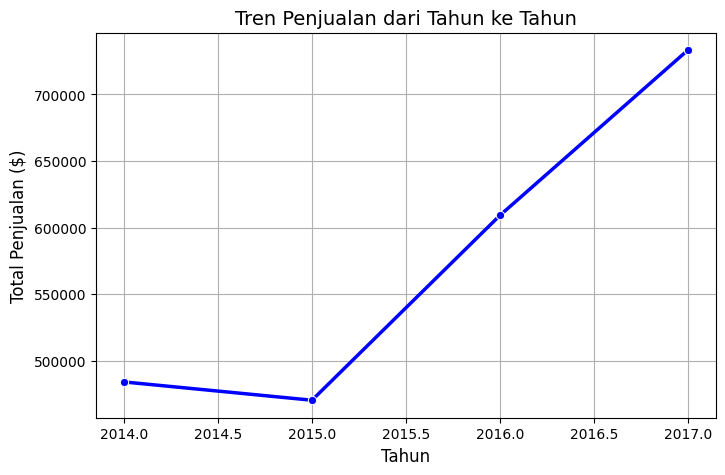

In [ ]:
# Agregasi total penjualan per tahun
sales_per_year = df_orders.groupby("Year")["Sales"].sum().reset_index()

# Plot tren penjualan dari tahun ke tahun
plt.figure(figsize=(8, 5))
sns.lineplot(data=sales_per_year, x="Year", y="Sales", marker="o", linewidth=2.5, color="blue")
plt.title("Tren Penjualan dari Tahun ke Tahun", fontsize=14)
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Total Penjualan ($)", fontsize=12)
plt.grid(True)
plt.show()

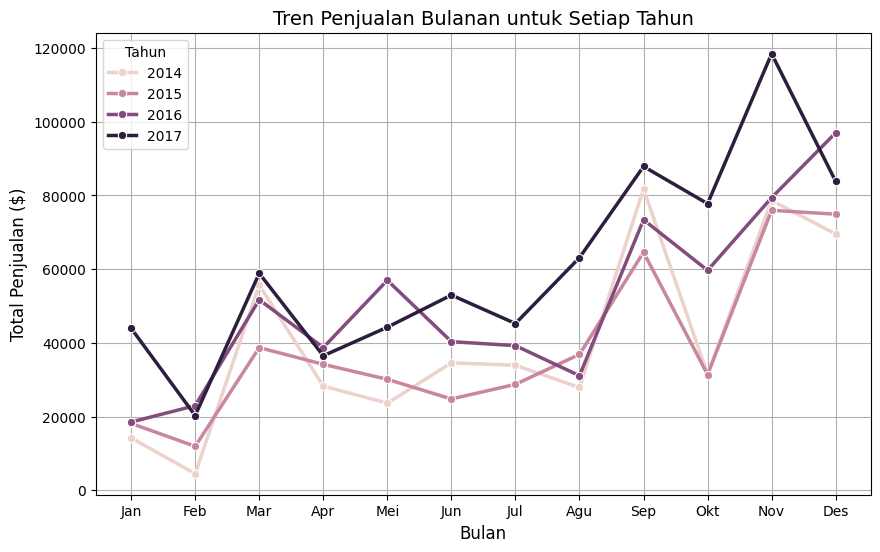

In [ ]:
# Agregasi total penjualan per bulan untuk setiap tahun
sales_per_month_year = df_orders.groupby(["Year", "Month"])["Sales"].sum().reset_index()

# Plot tren penjualan per bulan untuk setiap tahun
plt.figure(figsize=(10, 6))
sns.lineplot(data=sales_per_month_year, x="Month", y="Sales", hue="Year", marker="o", linewidth=2.5)
plt.title("Tren Penjualan Bulanan untuk Setiap Tahun", fontsize=14)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Total Penjualan ($)", fontsize=12)
plt.xticks(ticks=range(1, 13), labels=["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])
plt.legend(title="Tahun")
plt.grid(True)
plt.show()

2.	Produk atau Kategori Terlaris

<ipython-input-34-54e6a701848b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_per_category, x="Sales", y="Category", palette="Blues_r")


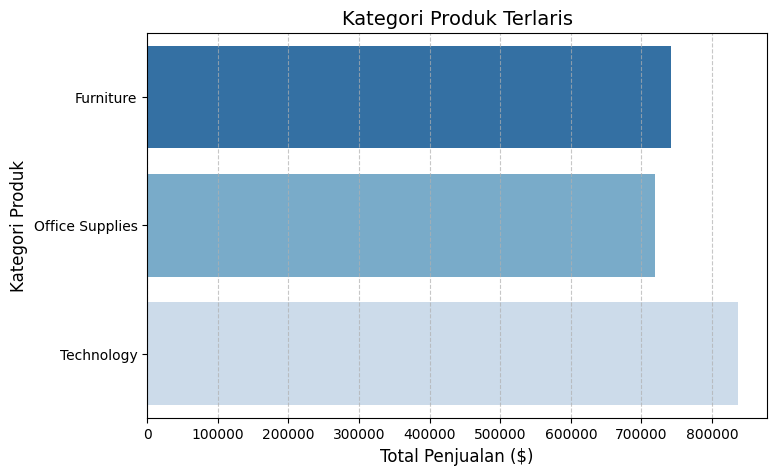

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


In [ ]:
# Agregasi total penjualan berdasarkan kategori produk
sales_per_category = df_orders.groupby("Category")["Sales"].sum().reset_index()

# Plot kategori terlaris berdasarkan total penjualan
plt.figure(figsize=(8, 5))
sns.barplot(data=sales_per_category, x="Sales", y="Category", palette="Blues_r")
plt.title("Kategori Produk Terlaris", fontsize=14)
plt.xlabel("Total Penjualan ($)", fontsize=12)
plt.ylabel("Kategori Produk", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Menampilkan data kategori terlaris
sales_per_category

3. Wilayah dengan Profit Tertinggi

<ipython-input-35-c095f13e3d79>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=profit_per_region, x="Profit", y="Region", palette="Greens_r")


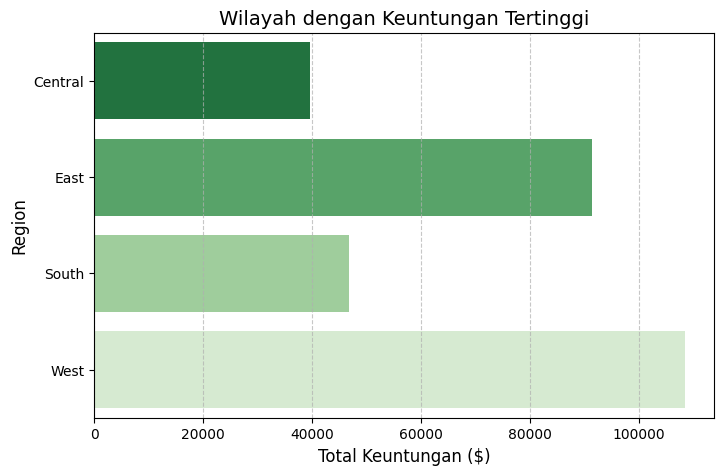

,Region,Profit
0,Central,39706.3625
1,East,91522.7800
2,South,46749.4303
3,West,108418.4489


In [ ]:
# Agregasi total keuntungan berdasarkan region
profit_per_region = df_orders.groupby("Region")["Profit"].sum().reset_index()

# Plot region dengan keuntungan tertinggi
plt.figure(figsize=(8, 5))
sns.barplot(data=profit_per_region, x="Profit", y="Region", palette="Greens_r")
plt.title("Wilayah dengan Keuntungan Tertinggi", fontsize=14)
plt.xlabel("Total Keuntungan ($)", fontsize=12)
plt.ylabel("Region", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Menampilkan data keuntungan per region
profit_per_region


4. Customer dengan Pembelian Terbanyak

<ipython-input-37-c5cabb2c6ece>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_customers, x="Sales", y="Customer Name", palette="Oranges_r")


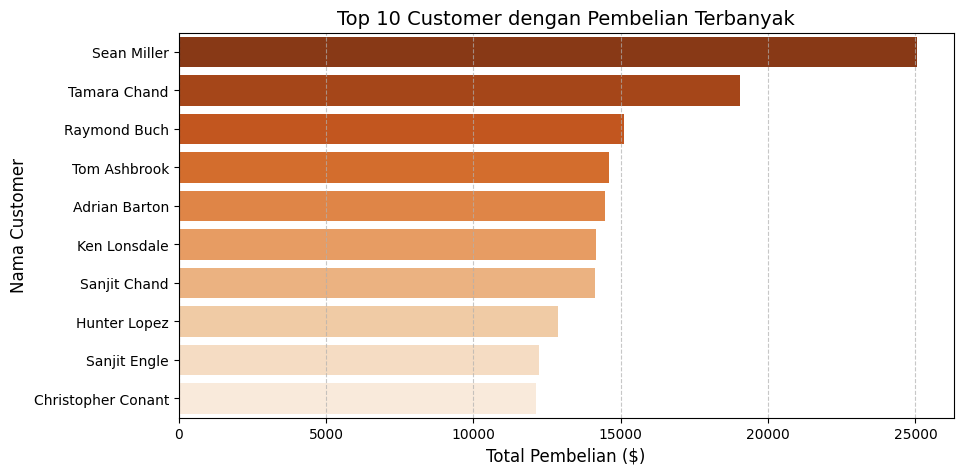

,Customer Name,Sales
686,Sean Miller,25043.050
730,Tamara Chand,19052.218
622,Raymond Buch,15117.339
757,Tom Ashbrook,14595.620
6,Adrian Barton,14473.571
441,Ken Lonsdale,14175.229
671,Sanjit Chand,14142.334
334,Hunter Lopez,12873.298
672,Sanjit Engle,12209.438
156,Christopher Conant,12129.072


In [ ]:
# Agregasi total penjualan per customer
top_customers = df_orders.groupby("Customer Name")["Sales"].sum().reset_index()

# Urutkan customer berdasarkan total sales terbesar
top_customers = top_customers.sort_values(by="Sales", ascending=False).head(10)

# Plot customer dengan total pembelian terbanyak
plt.figure(figsize=(10, 5))
sns.barplot(data=top_customers, x="Sales", y="Customer Name", palette="Oranges_r")
plt.title("Top 10 Customer dengan Pembelian Terbanyak", fontsize=14)
plt.xlabel("Total Pembelian ($)", fontsize=12)
plt.ylabel("Nama Customer", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Menampilkan daftar top 10 customer
top_customers


6. Jenis Pengiriman yang paling sering digunakan

<ipython-input-42-f94541911c93>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ship_mode_counts, x="Count", y="Ship Mode", palette="Purples_r")


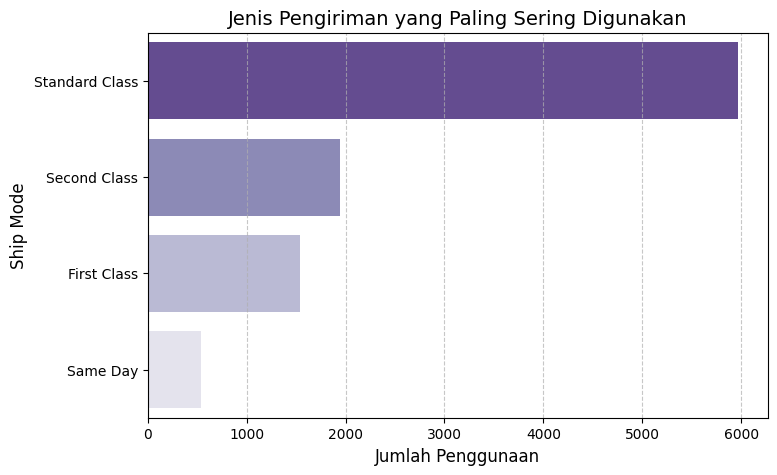

,Ship Mode,Count
0,Standard Class,5968
1,Second Class,1945
2,First Class,1538
3,Same Day,543


In [ ]:
# Hitung jumlah penggunaan masing-masing Ship Mode
ship_mode_counts = df_orders["Ship Mode"].value_counts().reset_index()
ship_mode_counts.columns = ["Ship Mode", "Count"]

# Plot Jenis Pengiriman yang paling sering digunakan
plt.figure(figsize=(8, 5))
sns.barplot(data=ship_mode_counts, x="Count", y="Ship Mode", palette="Purples_r")
plt.title("Jenis Pengiriman yang Paling Sering Digunakan", fontsize=14)
plt.xlabel("Jumlah Penggunaan", fontsize=12)
plt.ylabel("Ship Mode", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

# Menampilkan data jumlah penggunaan setiap Ship Mode
ship_mode_counts
